<a href="https://colab.research.google.com/github/suzzini/DS_Project/blob/main/DS_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이수진님은 게임 회사의 데이터 팀에 합류했습니다.

# **다음 분기에 어떤 게임을 설계해야 할까**

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DataScience/vgames2.csv")
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df=df.iloc[:,1:10]

In [ ]:
#M 제거
df['NA_Sales']=df['NA_Sales'].str.replace('M','')
df['EU_Sales']=df['EU_Sales'].str.replace('M','')
df['JP_Sales']=df['JP_Sales'].str.replace('M','')
df['Other_Sales']=df['Other_Sales'].str.replace('M','')
df['NA_Sales'][458]

'0.25'

In [ ]:
#변수를 임의로 설정하면 안되는 것인가 ?? 

#K단위들을 모두 M단위로 바꾸기(x1000)

df['NA_Sales'][df['NA_Sales'].str.contains('K')==True]=df['NA_Sales'][df['NA_Sales'].str.contains('K')==True].str.replace('K','').astype('float')/1000
df['EU_Sales'][df['EU_Sales'].str.contains('K')==True]=df['EU_Sales'][df['EU_Sales'].str.contains('K')==True].str.replace('K','').astype('float')/1000
df['JP_Sales'][df['JP_Sales'].str.contains('K')==True]=df['JP_Sales'][df['JP_Sales'].str.contains('K')==True].str.replace('K','').astype('float')/1000
df['Other_Sales'][df['Other_Sales'].str.contains('K')==True]=df['Other_Sales'][df['Other_Sales'].str.contains('K')==True].str.replace('K','').astype('float')/1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

In [ ]:
df['NA_Sales']=df['NA_Sales'].astype(float)
df['EU_Sales']=df['EU_Sales'].astype(float)
df['JP_Sales']=df['JP_Sales'].astype(float)
df['Other_Sales']=df['Other_Sales'].astype(float)

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

In [ ]:
#sum_sales feature 만들기

df['sum_sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [ ]:
# Year이 20년 이하면 +2000, 20 초과이면 +1900
df['Year'][df['Year']<=20]=df['Year'][df['Year']<=20]+2000
df['Year'][(df['Year']>20) & (df['Year']<100)]=df['Year'][(df['Year']>20) & (df['Year']<100)]+1900

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.groupby('Genre').mean().iloc[:,1:6]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
Genre,,,,,
Action,0.264693,0.157991,0.047776,0.056415,0.526874
Adventure,0.082547,0.050039,0.040586,0.013133,0.186305
Fighting,0.263518,0.119504,0.103117,0.043259,0.529398
Misc,0.235323,0.122468,0.060709,0.042699,0.461200
Platform,0.505023,0.228066,0.147794,0.058292,0.939174
Puzzle,0.213408,0.087768,0.098391,0.021661,0.421228
Racing,0.287361,0.190748,0.045374,0.062027,0.585511
Role-Playing,0.215469,0.123790,0.232603,0.038409,0.610270
Shooter,0.444893,0.239335,0.029266,0.078479,0.791972


In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
sum_sales        0
dtype: int64

In [ ]:
def new_year_col(x):
  if x<1991:
    return '80\'s'
  elif x<2001:
    return '90\'s'
  elif x<2011:
    return '00\'s'
  elif x<2021:
    return '10\'s'

In [ ]:
#genre나 year에 결측치가 있는 행은 제거

df['new_year']=df['Year'].apply(new_year_col)
G_Y=df[['Genre','new_year']]

G_Y=pd.DataFrame(G_Y.value_counts())
G_Y=pd.pivot_table(G_Y,index='new_year',columns='Genre',fill_value=0)
G_Y

0                           ...                                   
Genre    Action Adventure Fighting  Misc  ... Shooter Simulation Sports Strategy
new_year                                  ...                                   
00's       1762       769      453  1201  ...     779        617   1508      416
10's       1210       386      156   361  ...     314        128    384      115
80's         69         2        4     8  ...      30          4     25        0
90's        201       113      222   135  ...     157        100    382      139

[4 rows x 12 columns]

In [ ]:
G_Y=np.array(G_Y)

G_Y=pd.DataFrame(G_Y,index=['00\'s','10\'s','80\'s','90\'s'],columns=['Action',	'Adventure','Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports','Strategy'])

In [ ]:
G_Y=G_Y.reindex(index=['80\'s','90\'s','00\'s','10\'s'])
G_Y.sum()

Action          3242
Adventure       1270
Fighting         835
Misc            1705
Platform         874
Puzzle           567
Racing          1220
Role-Playing    1466
Shooter         1280
Simulation       849
Sports          2299
Strategy         670
dtype: int64

Text(0, 0.5, 'Number of release')

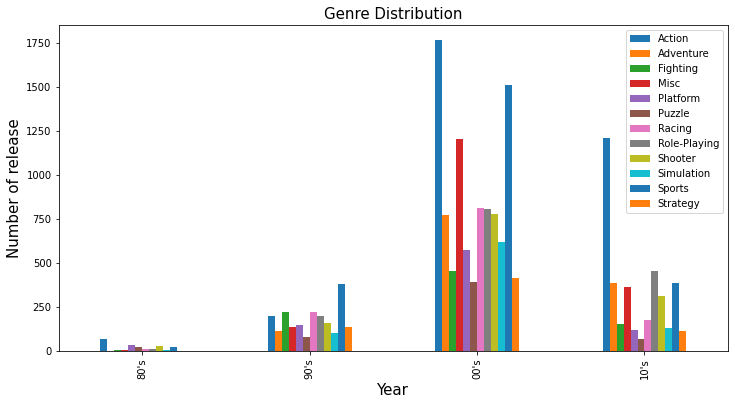

In [ ]:
G_Y.plot(kind='bar',figsize=(12, 6))

plt.title('Genre Distribution', fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of release',fontsize=15)   

In [ ]:
#연도별 게임 트렌드
G_Y2=df[['Genre','new_year','sum_sales']]
G_Y2=G_Y2.groupby(['new_year','Genre']).mean()
G_Y2#.sort_values(['sum_sales'])

sum_sales
new_year Genre                  
00's     Action         0.531635
         Adventure      0.178648
         Fighting       0.498631
         Misc           0.465520
         Platform       0.685420
         Puzzle         0.317716
         Racing         0.558483
         Role-Playing   0.565031
         Shooter        0.647060
         Simulation     0.460827
         Sports         0.566041
         Strategy       0.204615
10's     Action         0.456314
         Adventure      0.114767
         Fighting       0.427244
         Misc           0.390305
         Platform       0.739750
         Puzzle         0.141408
         Racing         0.501243
         Role-Playing   0.486211
         Shooter        1.226752
         Simulation     0.384453
         Sports         0.604844
         Strategy       0.191217
80's     Action         0.833188
         Adventure      2.390000
         Fighting       1.810000
         Misc           1.055000
         Platform       4.034444
         Puzzle         3.273333
         Racing         1.835000
         Role-Playing   1.797273
         Shooter        1.992333
         Simulation     0.410000
         Sports         1.355600
90's     Action         0.829104
         Adventure      0.422655
         Fighting       0.647613
         Misc           0.585037
         Platform       1.383151
         Puzzle         0.454074
         Racing         0.732252
         Role-Playing   1.046919
         Shooter        0.482293
         Simulation     0.542800
         Sports         0.485864
         Strategy       0.475036

In [ ]:
y_g=df.pivot_table(index='new_year',columns='Genre',values='sum_sales',aggfunc='sum') #mean
y_g#=pd.DataFrame(y_g)


y_g00=[	0.531635,	0.178648,	0.498631,	0.465520,	0.685420,	0.317716,	0.558483,	0.565031,	0.647060	,0.460827,	0.566041,	0.204615]
y_g10=[0.456314	,0.114767,	0.427244,	0.390305,	0.739750,	0.141408	,0.501243,	0.486211,	1.226752,0.384453,	0.604844,	0.191217]
y_g80=[0.833188	,2.390000	,1.810000	,1.055000,	4.034444,	3.273333,	1.835000,	1.797273,	1.992333,	0.410000,	1.355600,	0]
y_g90=[0.829104	,0.422655,	0.647613,	0.585037,	1.383151,	0.454074,	0.732252,	1.046919,	0.482293,	0.542800,	0.485864,	0.475036]
colors = sns.color_palette('hls',len(y_g00)) ## 색상 지정
genre=['Action',	'Adventure','Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports','Strategy']


y_g00_s=[	936.74,	137.38	,225.88,	559.09,	392.06	,125.18	,452.93,	453.72,	504.06,	284.33,	853.59,	85.12]
y_g80_s=[57.49,	4.78,	7.24	,8.44,	145.24,	68.74,18.35	,19.77,	59.77,	1.64,	33.89,	0]
y_g90_s=[166.65	,47.76,	143.77,	78.98	,201.94,	36.78,	162.56,	207.29,	75.72	,54.28,	185.60,	66.03]
y_g10_s=[552.14	,44.30,	66.65	,140.90,	88.77,	10.04,	88.72,	220.74,	385.20,	49.21	,232.26	,21.99]

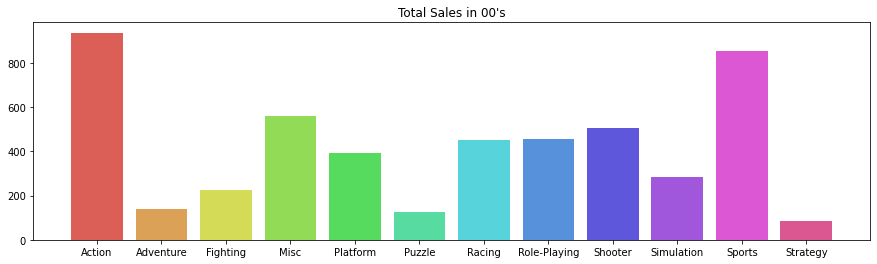

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(genre,y_g00_s,color=colors)
plt.title('Total Sales in 00\'s')

plt.show()

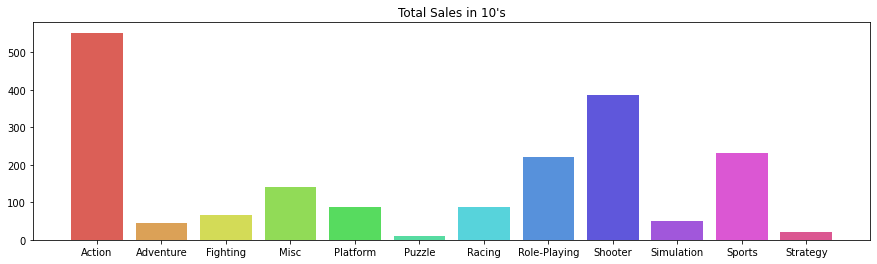

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(genre,y_g10_s,color=colors)
plt.title('Total Sales in 10\'s')

plt.show()

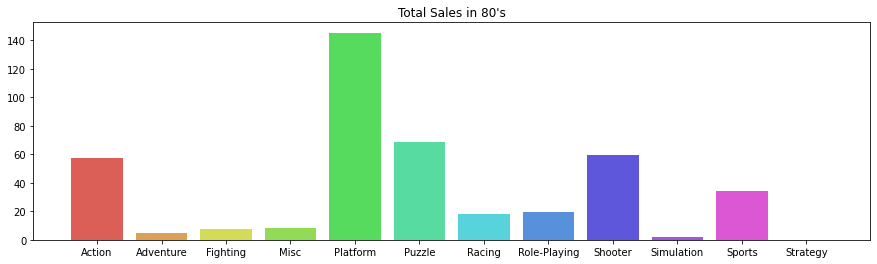

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(genre,y_g80_s,color=colors)
plt.title('Total Sales in 80\'s')
#plt.ylim(0, 4.2)
plt.show()

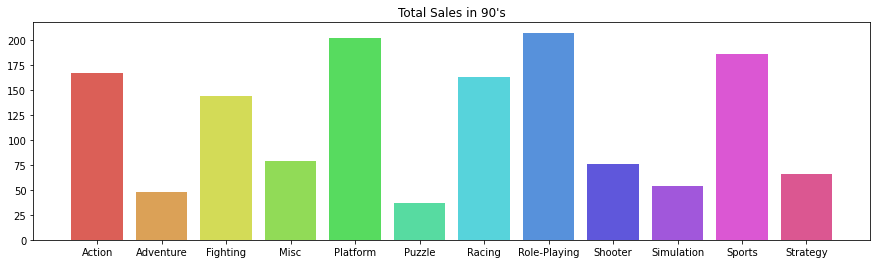

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(genre,y_g90_s,color=colors)
plt.title('Total Sales in 90\'s')
#plt.ylim(0, 4.0)
plt.show()

In [ ]:
df['sum_sales'][df['Genre']=='Platform']
#plt.boxplot(df['sum_sales'][(df['Genre']=='Puzzle') & (df['new_year']=='80\'s')])
df[(df['Genre']=='Shooter')& (df['new_year']=='10\'s')].sort_values(by='sum_sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales,new_year
2809,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,10's
9070,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,10's
4240,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.04,10's
6393,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.74,10's
14120,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.47,10's
...,...,...,...,...,...,...,...,...,...,...,...
8949,Touhou Genso Rondo: Bullet Ballet,PS4,2016.0,Shooter,Nippon Ichi Software,0.01,0.00,0.00,0.00,0.01,10's
3153,Caladrius,X360,2013.0,Shooter,Moss,0.00,0.00,0.01,0.00,0.01,10's
5356,Painkiller: Hell & Damnation,X360,2013.0,Shooter,Nordic Games,0.00,0.01,0.00,0.00,0.01,10's
5366,Assault Suit Leynos,PS4,2016.0,Shooter,Rising Star Games,0.01,0.00,0.00,0.00,0.01,10's


2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

2000년 이전에는 SPORTS 장르를 제외하고 두각을 나타내는 트렌드X

2000년 후반에는 모든 장르가 성장을 하는 와중 ACTION 장르가 선두두자를 꾀참.

In [ ]:
df['Year'][df.isnull().any(axis=1)]

31          NaN
50       2005.0
109         NaN
272      2010.0
273         NaN
          ...  
16425       NaN
16431    2007.0
16432       NaN
16555    2010.0
16587    2004.0
Name: Year, Length: 357, dtype: float64

Text(0, 0.5, 'Number of sales')

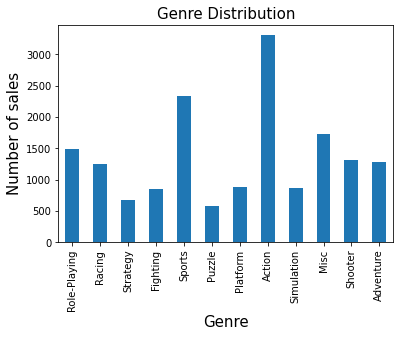

In [ ]:
df['Genre'].value_counts(sort=False).plot(kind='bar')
plt.title('Genre Distribution', fontsize=15)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Number of sales',fontsize=15) 

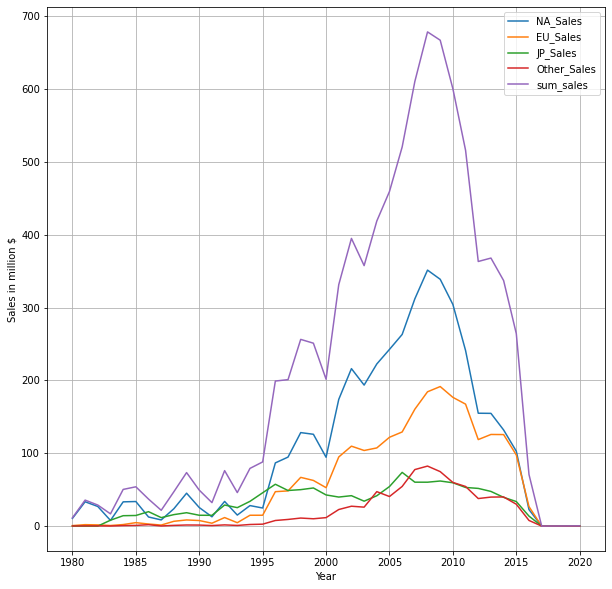

In [ ]:
df_forsale = df.groupby(by  = 'Year').sum()
df_forsale.plot.line(figsize=(10,10), grid="on");
plt.ylabel("Sales in million $");

In [ ]:
colors = sns.color_palette('hls',4) ## 색상 지정

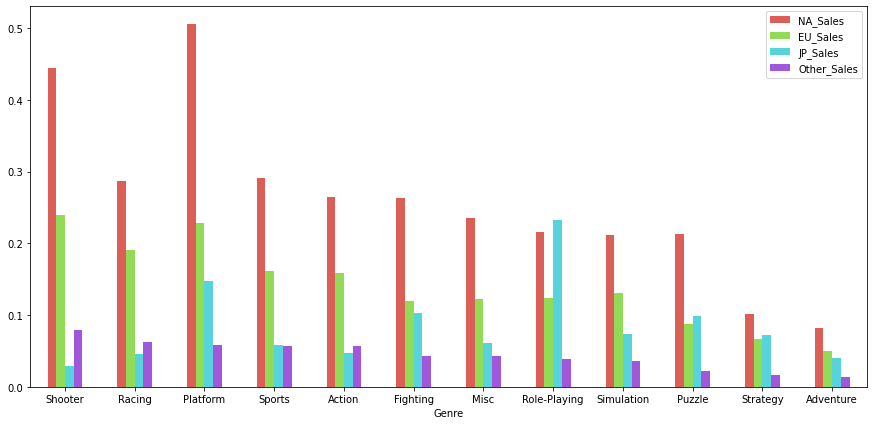

In [ ]:
publisher_sales = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']] #필요한 열만 추려서 데이터프레임 만듬
grouped=publisher_sales.groupby('Genre').mean() #Genre 기준으로 그룹화

grouped.sort_values('Other_Sales', ascending=False).plot(kind='bar',figsize=(15,7),rot=0,color=colors)

In [ ]:
_10M.sort_values(by='EU_Sales',ascending=False)

NameError: ignored

In [ ]:
grouped['Total_Sales']=grouped['NA_Sales']+grouped['EU_Sales']+grouped['JP_Sales']+grouped['Other_Sales'] #total_sales열을 새로 만들어줌
grouped['Total_Sales']/G_Y.sum() #장르별 출시된 게임의 가짓수로 나눠서 매출량을 확인
#가짓수 대비 platform 게임이 제일 매출량이 좋음

Genre
Action          0.000163
Adventure       0.000147
Fighting        0.000634
Misc            0.000270
Platform        0.001075
Puzzle          0.000743
Racing          0.000480
Role-Playing    0.000416
Shooter         0.000619
Simulation      0.000533
Sports          0.000247
Strategy        0.000384
dtype: float64

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

지역에 따라 크게 달라지는 양상을 확인하기 어려움.

NA : ACTION, UN:ACTION , JP:ROLE-PLAYING => ACTION , Other:Action



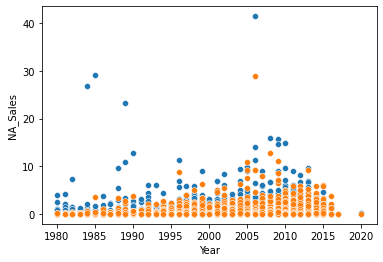

In [ ]:
sns.scatterplot(data=df,x='Year',y='NA_Sales')
sns.scatterplot(data=df,x='Year',y='EU_Sales')

In [ ]:
_pca=df.groupby(['Genre','Platform']).sum().iloc[:,1:5]

In [ ]:
df_pca=df.iloc[:,5:9]

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(_pca) # x객체에 _df를 표준화한 데이터를 저장

pca = PCA(2) #pc를 세개를 전부다 쓰는 것은 의미가 없음, 결론 :2개만 줘 
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['PC1', 'PC2'])
# 주성분으로 이루어진 데이터 프레임 구성
principalDf

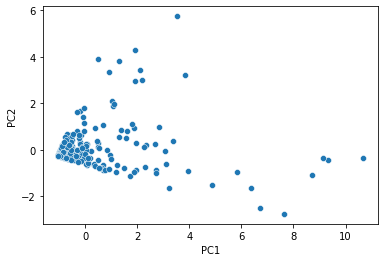

In [ ]:
sns.scatterplot(data=principalDf,x='PC1',y='PC2');

In [ ]:
ratio = pca.explained_variance_ratio_
ratio

array([0.76155879, 0.18902685])

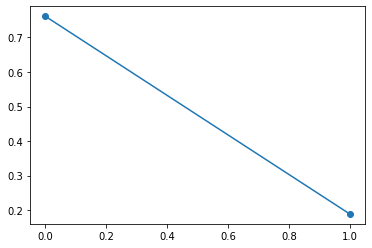

In [ ]:
plt.plot(ratio,'o-');

ValueError: ignored

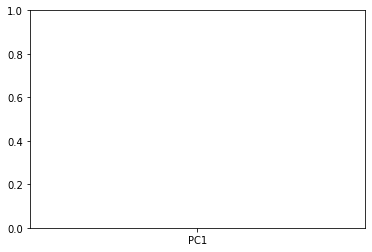

In [ ]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = ['PC1','PC2','PC3','PC4']#np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15','b']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:2])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
   
scree_plot(pca)

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales,new_year
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04,00's
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,00's
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,00's
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,00's
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,00's
...,...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,00's
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,00's
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,10's
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,10's


In [ ]:
#총 매출 10m부터 
_#10M=df.sort_values(by=['sum_sales'],ascending=False)
_10M=_10M[_10M['sum_sales']>10]
_10M_G=pd.DataFrame(_10M.groupby('Genre').mean().iloc[:,5])

#sns.barplot(data=_10M_G,x='Genre',y='sum_sales')
#_10M[_10M['Genre']=='Action'] #platform : 11개
#df.shape(16598, 11)

#df[df['Genre']=='Adventure'],

#상위 20%를 성공햇다고 가정햇을 때 3320 개

In [ ]:
action=np.array(df['sum_sales'][df['Genre']=='Action'])
adventure=np.array(df['sum_sales'][df['Genre']=='Adventure'])
fighting=np.array(df['sum_sales'][df['Genre']=='Fighting'])
misc=np.array(df['sum_sales'][df['Genre']=='Misc'])
platform=np.array(df['sum_sales'][df['Genre']=='Platform'])
puzzle=np.array(df['sum_sales'][df['Genre']=='Puzzle'])
racing=np.array(df['sum_sales'][df['Genre']=='Racing'])
role_playing=np.array(df['sum_sales'][df['Genre']=='Role-Playing'])

shooter=np.array(df['sum_sales'][df['Genre']=='Shooter'])
simulation=np.array(df['sum_sales'][df['Genre']=='Simulation'])
sports=np.array(df['sum_sales'][df['Genre']=='Sports'])
strategy=np.array(df['sum_sales'][df['Genre']=='Strategy'])


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


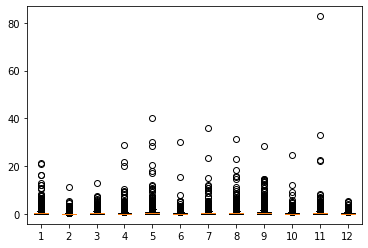

In [ ]:
plot_data = [action, adventure,fighting,misc,platform,puzzle,racing,role_playing,shooter,simulation,sports, strategy]
ax = plt.boxplot(plot_data)
plt.show()

In [ ]:
from scipy import stats
F_statistic, pVal = stats.f_oneway(action, adventure,fighting,misc,platform,puzzle,racing,role_playing,shooter,simulation,sports, strategy)

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Altman 910 데이터의 일원분산분석 결과 : F=18.2, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


In [ ]:
action=np.array(_10M['sum_sales'][_10M['Genre']=='Action'])
adventure=np.array(_10M['sum_sales'][_10M['Genre']=='Adventure'])
fighting=np.array(_10M['sum_sales'][_10M['Genre']=='Fighting'])
misc=np.array(_10M['sum_sales'][_10M['Genre']=='Misc'])
platform=np.array(_10M['sum_sales'][_10M['Genre']=='Platform'])
puzzle=np.array(_10M['sum_sales'][_10M['Genre']=='Puzzle'])
racing=np.array(_10M['sum_sales'][_10M['Genre']=='Racing'])
role_playing=np.array(_10M['sum_sales'][_10M['Genre']=='Role-Playing'])

shooter=np.array(_10M['sum_sales'][_10M['Genre']=='Shooter'])
simulation=np.array(_10M['sum_sales'][_10M['Genre']=='Simulation'])
sports=np.array(_10M['sum_sales'][_10M['Genre']=='Sports'])
strategy=np.array([0])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


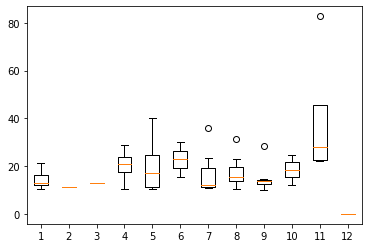

In [ ]:
plot_data = [action, adventure,fighting,misc,platform,puzzle,racing,role_playing,shooter,simulation,sports, strategy]
ax = plt.boxplot(plot_data)
plt.show()

In [ ]:
from scipy import stats
F_statistic, pVal = stats.f_oneway(action, adventure,fighting,misc,platform,puzzle,racing,role_playing,shooter,simulation,sports, strategy)

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Altman 910 데이터의 일원분산분석 결과 : F=2.4, p=0.01748
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


<BarContainer object of 11 artists>

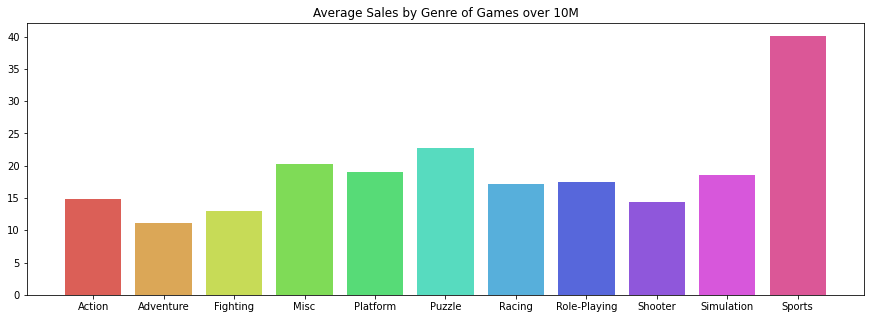

In [ ]:
_10M_G=[14.814444,	11.18	,13.04,	20.33	,19.098182,	22.78,	17.115714	,17.555,14.374167	,18.515	,40.115]
genre_g=['Action'	,'Adventure',	'Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports']
colors=sns.color_palette('hls',11)

plt.figure(figsize=(15,5))
plt.title('Average Sales by Genre of Games over 10M')
plt.bar(genre_g,_10M_G,color=colors)

<BarContainer object of 13 artists>

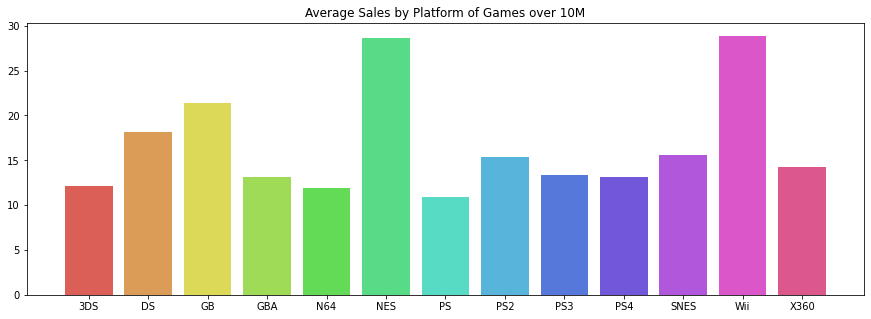

In [ ]:
colors=sns.color_palette('hls',13)

platform=['3DS',	'DS',	'GB',	'GBA',	'N64',	'NES',	'PS',	'PS2',	'PS3',	'PS4',	'SNES',	'Wii',	'X360']
#_10M_P=pd.DataFrame(_10M.groupby('Platform').mean().iloc[:,5]).T
_10M_P=[12.17	,18.198,	21.448333	,13.165	,11.9	,28.61,	10.95,	15.336,	13.381429,13.115,	15.585,	28.874,	14.248889]
plt.figure(figsize=(15,5))
plt.title('Average Sales by Platform of Games over 10M')
plt.bar(platform,_10M_P,color=colors)

<BarContainer object of 6 artists>

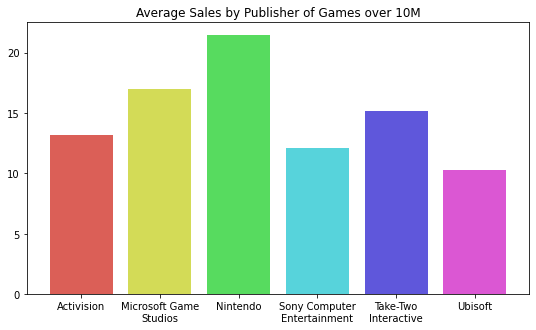

In [ ]:
colors=sns.color_palette('hls',6)

_10M_B=pd.DataFrame(_10M.groupby('Publisher').mean().iloc[:,5])

_10M_B=[13.204,	16.98,	21.433784,	12.085	,15.17875,	10.27]
publisher=['Activision',	'Microsoft Game\nStudios',	'Nintendo',	'Sony Computer\nEntertainment',	'Take-Two\nInteractive',	'Ubisoft']

plt.figure(figsize=(9,5))
plt.title('Average Sales by Publisher of Games over 10M')
plt.bar(publisher,_10M_B,color=colors)


In [ ]:
act=np.array(df['sum_sales'][df['Publisher']=='Activision'])
mgs=np.array(df['sum_sales'][df['Publisher']=='Microsoft Game Studios'])
nin=np.array(df['sum_sales'][df['Publisher']=='Nintendo'])
sne=np.array(df['sum_sales'][df['Publisher']=='Sony Computer Entertainment'])
tti=np.array(df['sum_sales'][df['Publisher']=='Take-Two Interactive'])
ubi=np.array(df['sum_sales'][df['Publisher']=='Ubisoft'])


from scipy import stats
F_statistic, pVal = stats.f_oneway(act, mgs,nin,sne,tti,ubi)

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Altman 910 데이터의 일원분산분석 결과 : F=48.8, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


In [ ]:
act=np.array(_10M['sum_sales'][_10M['Publisher']=='Activision'])
mgs=np.array(_10M['sum_sales'][_10M['Publisher']=='Microsoft Game Studios'])
nin=np.array(_10M['sum_sales'][_10M['Publisher']=='Nintendo'])
sne=np.array(_10M['sum_sales'][_10M['Publisher']=='Sony Computer Entertainment'])
tti=np.array(_10M['sum_sales'][_10M['Publisher']=='Take-Two Interactive'])
ubi=np.array(_10M['sum_sales'][_10M['Publisher']=='Ubisoft'])


from scipy import stats
F_statistic, pVal = stats.f_oneway(act, mgs,nin,sne,tti,ubi)

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:

    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Altman 910 데이터의 일원분산분석 결과 : F=1.6, p=0.17959


In [ ]:
#'3DS',	'DS',	'GB',	'GBA',	'N64',	'NES',	'PS',	'PS2',	'PS3',	'PS4',	'SNES',	'Wii',	'X360']
_3ds=np.array(_10M['sum_sales'][_10M['Platform']=='3DS'])
ds=np.array(_10M['sum_sales'][_10M['Platform']=='DS'])
gb=np.array(_10M['sum_sales'][_10M['Platform']=='GB'])
gba=np.array(_10M['sum_sales'][_10M['Platform']=='GBA'])
n64=np.array(_10M['sum_sales'][_10M['Platform']=='N64'])
nes=np.array(_10M['sum_sales'][_10M['Platform']=='NES'])
ps=np.array(_10M['sum_sales'][_10M['Platform']=='PS'])
ps2=np.array(_10M['sum_sales'][_10M['Platform']=='PS2'])
ps3=np.array(_10M['sum_sales'][_10M['Platform']=='PS3'])
ps4=np.array(_10M['sum_sales'][_10M['Platform']=='PS4'])
snes=np.array(_10M['sum_sales'][_10M['Platform']=='SNES'])
wii=np.array(_10M['sum_sales'][_10M['Platform']=='Wii'])
x360=np.array(_10M['sum_sales'][_10M['Platform']=='X360'])

from scipy import stats
F_statistic, pVal = stats.f_oneway(_3ds,ds,gb,gba,n64,nes,ps,ps2,ps3,ps4,snes,wii,x360)

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Altman 910 데이터의 일원분산분석 결과 : F=1.7, p=0.08728


In [ ]:
#'3DS',	'DS',	'GB',	'GBA',	'N64',	'NES',	'PS',	'PS2',	'PS3',	'PS4',	'SNES',	'Wii',	'X360']
_3ds=np.array(df['sum_sales'][df['Platform']=='3DS'])
ds=np.array(df['sum_sales'][df['Platform']=='DS'])
gb=np.array(df['sum_sales'][df['Platform']=='GB'])
gba=np.array(df['sum_sales'][df['Platform']=='GBA'])
n64=np.array(df['sum_sales'][df['Platform']=='N64'])
nes=np.array(df['sum_sales'][df['Platform']=='NES'])
ps=np.array(df['sum_sales'][df['Platform']=='PS'])
ps2=np.array(df['sum_sales'][df['Platform']=='PS2'])
ps3=np.array(df['sum_sales'][df['Platform']=='PS3'])
ps4=np.array(df['sum_sales'][df['Platform']=='PS4'])
snes=np.array(df['sum_sales'][df['Platform']=='SNES'])
wii=np.array(df['sum_sales'][df['Platform']=='Wii'])
x360=np.array(df['sum_sales'][df['Platform']=='X360'])

from scipy import stats
F_statistic, pVal = stats.f_oneway(_3ds,ds,gb,gba,n64,nes,ps,ps2,ps3,ps4,snes,wii,x360)

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Altman 910 데이터의 일원분산분석 결과 : F=27.3, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


In [ ]:
_10m=df.sort_values(by=['sum_sales'],ascending=False)[62:16598]

_10m[_10m['Genre']=='Action'] #platform :873
#_80per.shape

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales,new_year
9035,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.25,10's
761,Grand Theft Auto: Liberty City Stories,PSP,2005.0,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72,00's
1964,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,4.10,1.89,1.45,0.16,7.60,90's
1035,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.32,00's
11868,Uncharted 3: Drake's Deception,PS3,2011.0,Action,Sony Computer Entertainment,2.77,2.80,0.19,1.06,6.82,10's
...,...,...,...,...,...,...,...,...,...,...,...
15887,"Horse Life 4: My Horse, My Friend, My Champion",3DS,2015.0,Action,Unknown,0.00,0.01,0.00,0.00,0.01,10's
9093,Bunmei Kaika: Aoiza Ibunroku Saien,PSP,2012.0,Action,FuRyu,0.00,0.00,0.01,0.00,0.01,10's
9087,Barbie and Her Sisters Puppy Rescue,WiiU,2015.0,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01,10's
15842,Trine,PC,2009.0,Action,Nobilis,0.00,0.01,0.00,0.00,0.01,00's


In [ ]:
_10M=df[df['sum_sales']>10]
_10M.groupby('Genre').sum()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
Genre,,,,,,
Action,18072.0,61.19,40.42,7.11,24.61,133.33
Adventure,1992.0,6.16,2.04,2.69,0.29,11.18
Fighting,2008.0,6.75,2.61,2.66,1.02,13.04
Misc,8032.0,39.80,26.55,7.33,7.64,81.32
Platform,21978.0,117.23,44.27,38.18,10.40,210.08
Puzzle,3994.0,26.64,7.62,9.54,1.76,45.56
Racing,14036.0,47.24,38.21,16.91,17.45,119.81
Role-Playing,16029.0,52.78,37.83,43.84,5.99,140.44
Shooter,24103.0,104.36,47.67,3.19,17.27,172.49


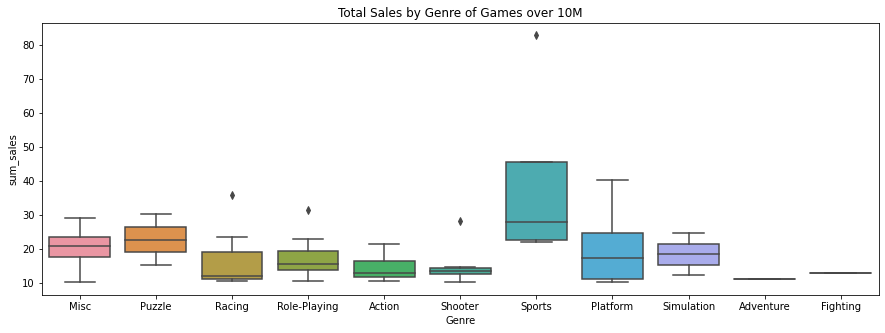

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Total Sales by Genre of Games over 10M')
sns.boxplot(data=_10M,x='Genre',y='sum_sales')

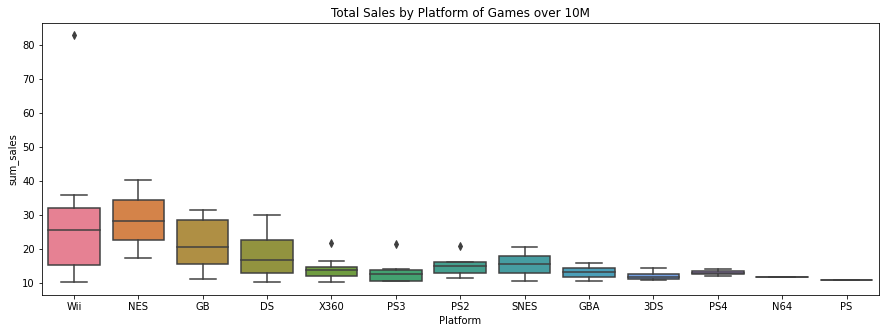

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Total Sales by Platform of Games over 10M')
sns.boxplot(data=_10M,x='Platform',y='sum_sales',palette="husl")

In [ ]:
_10M

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales,new_year
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,00's
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80's
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,00's
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,00's
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,90's
...,...,...,...,...,...,...,...,...,...,...,...
3007,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55,90's
1810,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49,00's
12472,Super Mario 64,DS,2004.0,Platform,Nintendo,5.08,3.11,1.25,0.98,10.42,00's
223,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27,10's


[Text(0, 0, 'Nintendo'),
 Text(0, 0, 'Microsoft Game\nStudios'),
 Text(0, 0, 'Take-Two\nInteractive'),
 Text(0, 0, 'Sony Computer\nEntertainment'),
 Text(0, 0, 'Activision'),
 Text(0, 0, 'Ubisoft')]

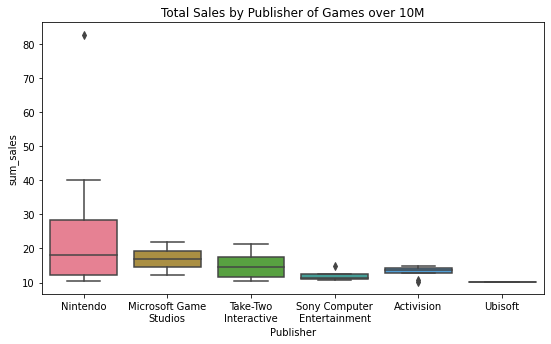

In [ ]:
publisher=['Nintendo',	'Microsoft Game\nStudios',	'Take-Two\nInteractive',	'Sony Computer\nEntertainment','Activision',	'Ubisoft']
plt.figure(figsize=(9,5))
plt.title('Total Sales by Publisher of Games over 10M')
ax=sns.boxplot(data=_10M,x='Publisher',y='sum_sales',palette="husl")
ax.set_xticklabels(publisher)
#colors[0]

In [ ]:
_10M[_10M['Publisher']=='Nintendo'].sort_values(by='sum_sales')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales,new_year
12472,Super Mario 64,DS,2004.0,Platform,Nintendo,5.08,3.11,1.25,0.98,10.42,00's
1810,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49,00's
3007,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55,90's
12623,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79,10's
6847,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18,90's
4251,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33,10's
12405,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52,00's
4806,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90,00's
6458,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.90,90's
11123,Mario Kart 7,3DS,2011.0,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21,10's


In [ ]:
df[df['Genre']=='Platform']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales,new_year
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,00's
20,Ty the Tasmanian Tiger,PS2,2002.0,Platform,Electronic Arts,0.57,0.45,0.00,0.15,1.17,00's
25,Dr. Muto,GC,2002.0,Platform,Midway Games,0.02,0.01,0.00,0.00,0.03,00's
28,Famicom Mini: Makaimura,GBA,2004.0,Platform,Capcom,0.00,0.00,0.08,0.00,0.08,00's
34,Mega Man Anniversary Collection,PS2,2004.0,Platform,Capcom,0.29,0.22,0.00,0.08,0.59,00's
...,...,...,...,...,...,...,...,...,...,...,...
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,00's
16563,Wall-E,Wii,2008.0,Platform,THQ,0.51,0.40,0.00,0.11,1.02,00's
16578,Gex: Enter the Gecko,PS,1998.0,Platform,BMG Interactive Entertainment,0.32,0.22,0.00,0.04,0.58,90's
16579,Super Ghouls 'n Ghosts,GBA,2002.0,Platform,Capcom,0.05,0.02,0.00,0.00,0.07,00's


In [ ]:
genre=['Action',	'Adventure','Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports','Strategy']

genre_s=[] # 성공한 게임 중 특정 장르의 개수
genre_f=[] # 실패한 게임 중 특정 장르의 개수
for i in genre:
  #print(i)
  genre_s.append(_10M[_10M['Genre']==i].shape[0])

for i in genre:
  #print(i)
  genre_f.append(_10m[_10m['Genre']==i].shape[0])

s_num=62/16598 #성공한 게임의 확률
f_num=1-s_num
s_result=[]
f_result=[]
for i in range(len(genre)):
  s_result.append((genre_s[i]/61*s_num)/((genre_s[i]/61*s_num)+(genre_f[i]/16487*f_num)))
  f_result.append((genre_f[i]/16487*f_num)/((genre_f[i]/16487*f_num)+(genre_s[i]/61*s_num)))


genre_s
#sum(s_result)+sum(f_result)
#(genre_s[4]/62*s_num)/((genre_s[4]/62*s_num)+(genre_f[4]/16356))

[9, 1, 1, 4, 11, 2, 7, 8, 12, 2, 4, 0]

In [ ]:
genre_f


[3296, 1279, 846, 1730, 873, 576, 1236, 1475, 1296, 863, 2337, 680]

In [ ]:
a=[]
for i in genre_s:
  a.append(0.0037*i/62)

sum(a)

0.0036403225806451614

In [ ]:
b=[]
for i in genre_f:
  b.append(0.9962*i/16536)

sum(b)+sum(a)

0.9968883511244283

In [ ]:
for i in range(len(genre)):
  print(format(a[i],'.8f'))

0.00053710
0.00005968
0.00005968
0.00023871
0.00065645
0.00011935
0.00041774
0.00047742
0.00071613
0.00011935
0.00023871
0.00000000


In [ ]:
for i in range(len(genre)):
  print(format(b[i],'.8f'))

0.19856526
0.07705248
0.05096669
0.10422267
0.05259329
0.03470073
0.07446197
0.08886037
0.07807663
0.05199084
0.14079097
0.04096613


In [ ]:
sum(a)+sum(b)

0.9968883511244283

In [ ]:
b[0]*0.9962

0.19781071566521527

In [ ]:
res=[]
for i in range(len(genre)):
  res.append(a[i]*0.0037/(a[i]*0.0037+b[i]*0.9962))

for i in range(len(genre)):
  print(format(res[i],'.8f'))

0.00001005
0.00000288
0.00000435
0.00000851
0.00004636
0.00001277
0.00002084
0.00001995
0.00003407
0.00000853
0.00000630
0.00000000


In [ ]:
res1=[]
for i in range(len(genre)):
  res1.append(b[i]*0.9962/(a[i]*0.0037+b[i]*0.9962))
res1

[0.9999899538399953,
 0.9999971234140581,
 0.999995651125292,
 0.9999914933347844,
 0.999953643839675,
 0.9999872252881844,
 0.9999791637448202,
 0.9999800456103719,
 0.9999659348271129,
 0.9999914736207806,
 0.9999937027970308,
 1.0]

Platform 으로 출시할 때 성공(총매출 10M이상)할 확률이 제일 큼.

In [ ]:
_10M.isnull().sum()

Name           0
Platform       0
Year           0
Genre          1
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
sum_sales      0
new_year       0
dtype: int64

In [ ]:
_10M.sort_values('sum_sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales,new_year
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,00's
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80's
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,00's
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,00's
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,90's
...,...,...,...,...,...,...,...,...,...,...,...
3007,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55,90's
1810,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49,00's
12472,Super Mario 64,DS,2004.0,Platform,Nintendo,5.08,3.11,1.25,0.98,10.42,00's
223,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27,10's


In [ ]:
test=_10M.groupby('Publisher').mean().iloc[:,1:6]#
test
#test.sort_values('sum_sales',ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
Publisher,,,,,
Activision,6.946000,4.421000,0.278000,1.559000,13.204000
Microsoft Game Studios,11.470000,3.885000,0.185000,1.440000,16.980000
Nintendo,10.327838,5.832703,3.881351,1.391892,21.433784
Sony Computer Entertainment,4.210000,3.462500,1.580000,2.832500,12.085000
Take-Two Interactive,7.098750,4.706250,0.393750,2.980000,15.178750
Ubisoft,6.050000,3.150000,0.000000,1.070000,10.270000


In [ ]:
p_s_ttest=df.groupby('Platform').mean().iloc[:,1:5]
p_s_ttest
#p_s_ttest=np.array(p_s_ttest)
#p_s_ttest

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,0.681203,0.041128,0.000000,0.006842
3DO,0.000000,0.000000,0.033333,0.000000
3DS,0.154951,0.114971,0.191257,0.024813
DC,0.104423,0.032500,0.164615,0.005192
DS,0.180633,0.089991,0.081170,0.027984
GB,1.166531,0.487959,0.868571,0.083673
GBA,0.228151,0.091545,0.057579,0.009404
GC,0.240036,0.069622,0.038813,0.009317
GEN,0.713704,0.204444,0.098889,0.032963


In [ ]:
p_s_ttest.sort_values('sum_sales',ascending=False)
p_s_ttest
#p_s_ttest=np.array(p_s_ttest)

KeyError: ignored

t-test

귀무가설 : 게임 플랫폼과 매출 간 사이의 관련성이 없다.
대안가설 : 게임 플랫폼과 매출 간 사이의 관련성이 있다.



In [ ]:
from scipy.stats import chi2_contingency

print(chi2_contingency(test))

In [ ]:
df['Platform'].unique()

In [ ]:
df_test=df.groupby('Platform').mean().iloc[:,1:5]
print(chi2_contingency(df_test))

In [ ]:
df['success_game'] = (df.sum_sales > 10).astype(int) #10M이상은 1 
sp=np.array(df.iloc[:,[3,11]]) # 장르와 성공지표
sp

In [ ]:
df.groupby('Genre').sum()

In [ ]:
genre

In [ ]:
_b=pd.DataFrame(df.groupby('Genre').mean().iloc[:,5])
_b

In [ ]:
from scipy.stats import chisquare 
chisquare(_b, axis=None) # One sample chi-square

#장르별 매출의 평균은 유의하다 => 다르다

In [ ]:
_c=pd.DataFrame(df.groupby('Platform').sum().iloc[:,5])
chisquare(_c, axis=None) # One sample chi-square

#플랫폼별 매출의 평균은 유의하다 => 다르다, 비슷하지 않다.

In [ ]:
_d=pd.DataFrame(df.groupby('Publisher').mean().iloc[:,5])
chisquare(_d, axis=None) # One sample chi-square

#플랫폼별 매출의 평균은 유의하다 => 다르다, 비슷하지 않다.

In [ ]:

_a=np.array([[9, 1, 1, 4, 11, 2, 7, 8, 12, 2, 4, 0],[3296, 1279, 846, 1730, 873, 576, 1236, 1475, 1296, 863, 2337, 680]])

_ttest=pd.DataFrame(index=['S','F'],columns=genre,data=_a)
_ttest
#[9, 1, 1, 4, 11, 2, 7, 8, 12, 2, 4, 0]
#[3296, 1279, 846, 1730, 873, 576, 1236, 1475, 1296, 863, 2337, 680]

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(_ttest)

In [ ]:
tg1 = sp[sp[: , 1]==0,0]
tg2 = sp[sp[: , 1]==1,0]

In [ ]:
from scipy import stats
stats.ttest_ind(tg1, tg2) 